In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import json
import pickle


#### 1. Problem Statement

#### 2. Data Gathering

In [2]:
df=pd.read_csv('Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


###### 3. EDA

In [4]:
columns_list=df.columns

In [5]:
import re

In [15]:
col_list=[]
for col_name in columns_list:
    col_name=re.sub('[-/]','_',col_name.strip())
    col_name=re.sub(' ','_',col_name)
    col_list.append(col_name)
print(col_list)

['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness__1_19_years', 'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling']


In [16]:
df.columns=col_list

In [17]:
df

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  Polio               

In [19]:
df['Status'].value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

In [20]:
df['Status'].replace({'Developing':1,'Developed':2},inplace=True)

In [21]:
df['Life_expectancy'].value_counts()

Life_expectancy
73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
        ..
43.1     1
49.5     1
49.0     1
55.1     1
45.4     1
Name: count, Length: 362, dtype: int64

In [24]:
df['Life_expectancy'].unique()

array([65. , 59.9, 59.5, 59.2, 58.8, 58.6, 58.1, 57.5, 57.3, 57. , 56.7,
       56.2, 55.3, 54.8, 77.8, 77.5, 77.2, 76.9, 76.6, 76.2, 76.1, 75.3,
       75.9, 74.2, 73.5, 73. , 72.8, 73.3, 73.6, 72.6, 75.6, 75.4, 75.1,
       74.9, 74.7, 74.4, 74.1, 73.8, 73.4, 72.9, 72.3, 71.7, 71.6, 71.4,
       71.3, 52.4, 51.7, 51.1, 56. , 51. , 49.6, 49.1, 48.7, 48.2, 47.7,
       47.4, 47.1, 46.8, 46.5, 45.7, 45.3, 76.4, 75.7, 75.2, 75. , 74.8,
       74.6, 74. , 76.3, 76. , 75.5, 73.9, 73.2, 72.7, 72. , 82.8, 82.7,
       82.5, 82.3, 82. , 81.9, 81.7, 81.3, 81.2, 81. , 86. , 83. , 79.9,
       79.5, 81.5, 81.4, 81.1, 88. , 84. , 79.8, 79.4, 79.3, 78.8, 78.7,
       78.6, 78.1, 72.5, 72.2, 71.9, 71.1, 78. , 69.2, 68.4, 67.8, 67.5,
       66.6, 74.5, 73.1, 76.8, 76.7, 76.5, 75.8, 71.8, 71. , 77. , 69.9,
       69.5, 69.1, 68.6, 68.2, 67.3, 66.8, 66.3, 65.8, 65.3, 73.7, 70. ,
       69.8, 68.9, 68.1, 67.7, 67.2, 68. , 89. , 87. , 80. , 78.9, 78.3,
       77.6, 69.4, 69.6, 69. , 68.7, 68.5, 68.3, 60

In [25]:
df['Life_expectancy'].fillna(df['Life_expectancy'].mean(),inplace=True)

In [27]:
df['Life_expectancy'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: Life_expectancy
Non-Null Count  Dtype  
--------------  -----  
2938 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


In [29]:
df['Adult_Mortality'].isna().sum()

10

In [30]:
df['Adult_Mortality'].fillna(df['Adult_Mortality'].mean(),inplace=True)

In [31]:
df['Adult_Mortality'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: Adult_Mortality
Non-Null Count  Dtype  
--------------  -----  
2938 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


<Axes: >

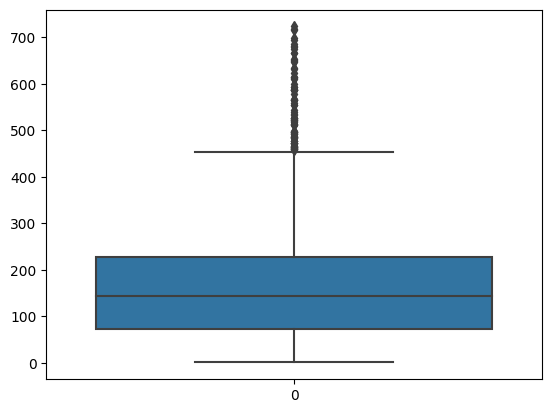

In [33]:
sns.boxplot(df['Adult_Mortality'])

In [34]:
df['Adult_Mortality'].mean()

164.7964480874317

In [35]:
df['Adult_Mortality'].median()

144.0

In [36]:
df['infant_deaths'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: infant_deaths
Non-Null Count  Dtype
--------------  -----
2938 non-null   int64
dtypes: int64(1)
memory usage: 23.1 KB


In [37]:
df['Alcohol'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: Alcohol
Non-Null Count  Dtype  
--------------  -----  
2744 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


In [38]:
df['Alcohol'].isna().sum()

194

In [39]:
df['Alcohol'].mean()

4.602860787172012

In [40]:
df['Alcohol'].median()

3.755

In [42]:
df['Alcohol'].fillna(df['Alcohol'].mean(),inplace=True)

In [43]:
df['percentage_expenditure'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: percentage_expenditure
Non-Null Count  Dtype  
--------------  -----  
2938 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


In [44]:
df['Hepatitis_B'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: Hepatitis_B
Non-Null Count  Dtype  
--------------  -----  
2385 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


In [45]:
df['Hepatitis_B'].isna().sum()

553

In [46]:
df['Hepatitis_B'].value_counts()

Hepatitis_B
99.0    240
98.0    210
96.0    167
97.0    155
95.0    149
       ... 
15.0      1
12.0      1
32.0      1
11.0      1
19.0      1
Name: count, Length: 87, dtype: int64

In [47]:
df['Hepatitis_B'].mean()

80.94046121593291

In [48]:
df['Hepatitis_B'].median()

92.0

In [49]:
df['Hepatitis_B'].fillna(df['Hepatitis_B'].median(),inplace=True)

In [50]:
df['Hepatitis_B'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: Hepatitis_B
Non-Null Count  Dtype  
--------------  -----  
2938 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


In [51]:
df['Measles'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: Measles
Non-Null Count  Dtype
--------------  -----
2938 non-null   int64
dtypes: int64(1)
memory usage: 23.1 KB


In [52]:
df['BMI'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: BMI
Non-Null Count  Dtype  
--------------  -----  
2904 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


In [53]:
df['BMI'].isna().sum()

34

In [54]:
df['BMI'].mean()

38.321246556473824

In [55]:
df['BMI'].median()

43.5

In [56]:
df['BMI'].value_counts()

BMI
58.5    18
55.8    16
57.0    16
54.2    15
59.9    15
        ..
7.6      1
72.8     1
74.1     1
74.6     1
33.9     1
Name: count, Length: 608, dtype: int64

<Axes: >

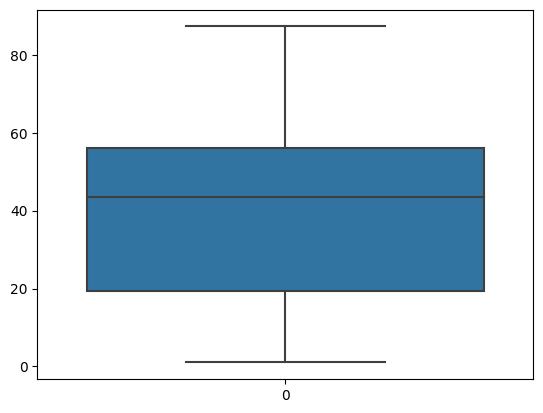

In [57]:
sns.boxplot(df['BMI'])

In [58]:
df['BMI'].fillna(df['BMI'].median(),inplace=True)

In [59]:
df['under_five_deaths'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: under_five_deaths
Non-Null Count  Dtype
--------------  -----
2938 non-null   int64
dtypes: int64(1)
memory usage: 23.1 KB


In [60]:
df['Polio'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: Polio
Non-Null Count  Dtype  
--------------  -----  
2919 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


In [61]:
df['Polio'].isna().sum()

19

In [62]:
df['Polio'].mean()

82.55018842069202

In [63]:
df['Polio'].median()

93.0

<Axes: >

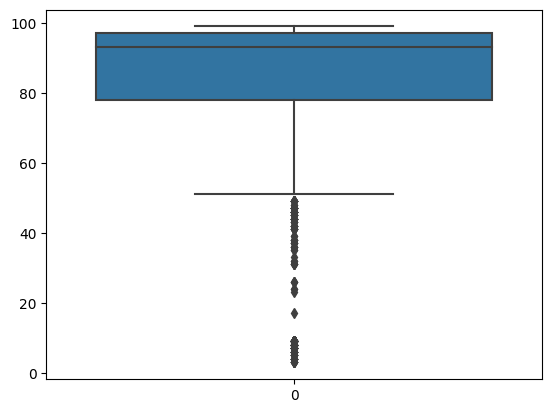

In [64]:
sns.boxplot(df['Polio'])

In [65]:
df['Polio'].fillna(df['Polio'].median(),inplace=True)

In [66]:
df['Total_expenditure'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: Total_expenditure
Non-Null Count  Dtype  
--------------  -----  
2712 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


In [67]:
df['Total_expenditure'].isna().sum()

226

In [68]:
df['Total_expenditure'].mean()

5.9381895280235995

In [69]:
df['Total_expenditure'].median()

5.755

In [70]:
df['Total_expenditure'].fillna(df['Total_expenditure'].mean(),inplace=True)

In [71]:
df['Diphtheria'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: Diphtheria
Non-Null Count  Dtype  
--------------  -----  
2919 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


In [72]:
df['Diphtheria'].isna().sum()

19

In [73]:
df['Diphtheria'].mean()

82.32408359027065

In [74]:
df['Diphtheria'].median()

93.0

<Axes: >

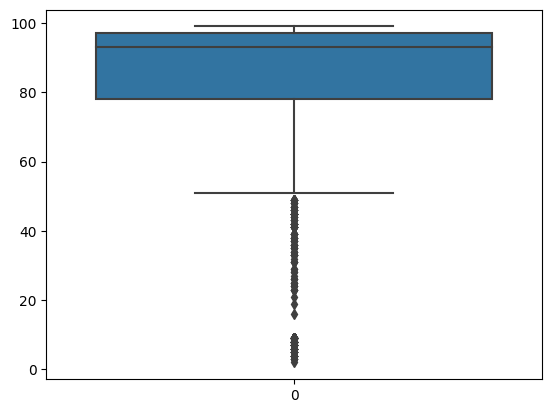

In [75]:
sns.boxplot(df['Diphtheria'])

In [76]:
df['Diphtheria'].value_counts()

Diphtheria
99.0    350
98.0    254
97.0    205
96.0    201
95.0    200
       ... 
16.0      1
56.0      1
21.0      1
19.0      1
27.0      1
Name: count, Length: 81, dtype: int64

In [77]:
df['Diphtheria'].fillna(df['Diphtheria'].median(),inplace=True)

In [78]:
df['HIV_AIDS'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: HIV_AIDS
Non-Null Count  Dtype  
--------------  -----  
2938 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


In [79]:
df['GDP'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: GDP
Non-Null Count  Dtype  
--------------  -----  
2490 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


In [80]:
df['GDP'].isna().sum()

448

In [81]:
df['GDP'].mean()

7483.158469138474

In [82]:
df['GDP'].median()

1766.947595

In [83]:
df['GDP'].value_counts()

GDP
584.259210     1
354.818600     1
358.997310     1
43.646498      1
416.148380     1
              ..
4274.376857    1
4142.869175    1
3725.632210    1
2964.477340    1
547.358878     1
Name: count, Length: 2490, dtype: int64

<Axes: >

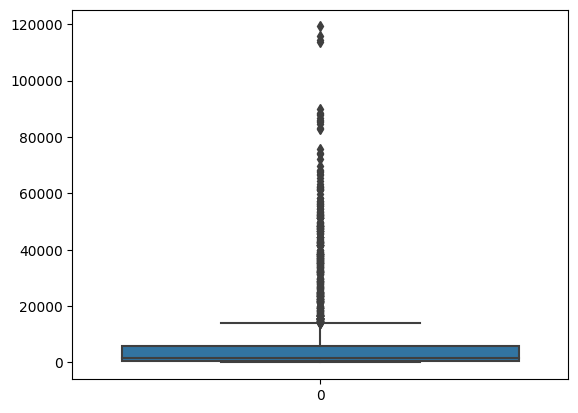

In [84]:
sns.boxplot(df['GDP'])

In [85]:
df['GDP'].fillna(df['GDP'].median(),inplace=True)

In [86]:
df['Population'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: Population
Non-Null Count  Dtype  
--------------  -----  
2286 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


In [87]:
df['Population'].isna().sum()

652

In [88]:
df['Population'].mean()

12753375.120052494

In [89]:
df['Population'].median()

1386542.0

In [90]:
df['Population'].fillna(df['Population'].median(),inplace=True)

In [91]:
df['thinness__1_19_years'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: thinness__1_19_years
Non-Null Count  Dtype  
--------------  -----  
2904 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


In [92]:
df['thinness__1_19_years'].isna().sum()

34

In [93]:
df['thinness__1_19_years'].mean()

4.839703856749312

In [94]:
df['thinness__1_19_years'].median()

3.3

In [95]:
df['thinness__1_19_years'].fillna(df['thinness__1_19_years'].median(),inplace=True)

In [96]:
df['thinness_5_9_years'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: thinness_5_9_years
Non-Null Count  Dtype  
--------------  -----  
2904 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


In [97]:
df['thinness_5_9_years'].isna().sum()

34

In [98]:
df['thinness_5_9_years'].mean()

4.870316804407714

In [99]:
df['thinness_5_9_years'].median()

3.3

<Axes: >

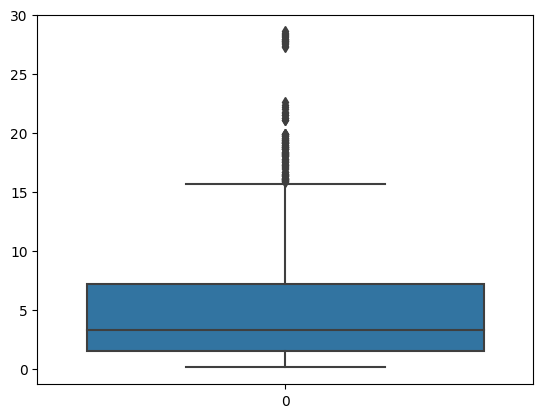

In [100]:
sns.boxplot(df['thinness_5_9_years'])

In [101]:
df['thinness_5_9_years'].fillna(df['thinness_5_9_years'].median(),inplace=True)

In [102]:
df['Income_composition_of_resources'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: Income_composition_of_resources
Non-Null Count  Dtype  
--------------  -----  
2771 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


In [103]:
df['Income_composition_of_resources'].isna().sum()

167

In [104]:
df['Income_composition_of_resources'].mean()

0.6275510645976182

In [105]:
df['Income_composition_of_resources'].median()

0.677

In [106]:
df['Income_composition_of_resources'].fillna(df['Income_composition_of_resources'].mean(),inplace=True)

In [107]:
df['Schooling'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: Schooling
Non-Null Count  Dtype  
--------------  -----  
2775 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


In [108]:
df['Schooling'].isna().sum()

163

In [109]:
df['Schooling'].mean()

11.992792792792793

In [110]:
df['Schooling'].median()

12.3

In [111]:
df['Schooling'].fillna(df['Schooling'].mean(),inplace=True)

In [114]:
df=df.drop(['Country'],axis=1)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   int64  
 2   Life_expectancy                  2938 non-null   float64
 3   Adult_Mortality                  2938 non-null   float64
 4   infant_deaths                    2938 non-null   int64  
 5   Alcohol                          2938 non-null   float64
 6   percentage_expenditure           2938 non-null   float64
 7   Hepatitis_B                      2938 non-null   float64
 8   Measles                          2938 non-null   int64  
 9   BMI                              2938 non-null   float64
 10  under_five_deaths                2938 non-null   int64  
 11  Polio                            2938 non-null   float64
 12  Total_expenditure   

##### 4. Feature Selection

###### 4.1 Linearity

In [117]:
df.corr().iloc[2:3,:]

,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
Life_expectancy,0.169623,0.481962,1.0,-0.696359,-0.196535,0.391598,0.381791,0.170555,-0.157574,0.555653,...,0.458449,0.207981,0.472253,-0.556457,0.430895,-0.028845,-0.467267,-0.461739,0.692483,0.715066


<Axes: >

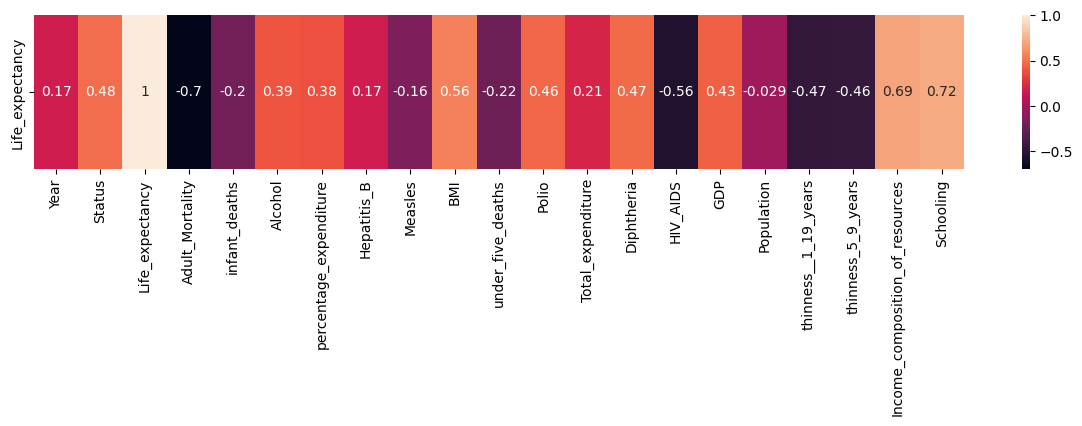

In [119]:
plt.figure(figsize=(15,2))
sns.heatmap(df.corr().iloc[2:3,:],annot=True)

###### 4.2 No Multicolinearity

In [120]:
x=df.drop(['Life_expectancy'],axis=1)

In [121]:
y=df['Life_expectancy']

In [122]:
vif_list=[]
for i in range(x.shape[1]):
    vif=variance_inflation_factor(x,i)
    vif_list.append(vif)
print(vif_list)

[66.59156639167247, 19.845370589448592, 4.806268609963844, 188.84362466822384, 4.383869248735317, 6.537749067955801, 18.413108227531655, 1.4400927827827408, 8.114100236555197, 188.1926493964395, 26.162541251519606, 8.586354480342212, 28.372081624838472, 1.5892923350188597, 7.439273883681135, 1.5436306063437728, 19.329027782811018, 19.26154239068352, 31.498810927317194, 48.05505689773535]


##### 5. Model Training

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [124]:
lin_reg=LinearRegression()

In [125]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [129]:
y_pred_test=lin_reg.predict(x_test)
y_pred_test.shape

(588,)

In [127]:
y_pred_train=lin_reg.predict(x_train)


##### 6. Model Evaluation

###### Tetsing Data Evaluation

In [133]:
residual_test=y_test-y_pred_test
#print('residual_test:', residual_test)
mse_test=mean_squared_error(y_test,y_pred_test)
print('MSE_test:', mse_test)
rmse_test=np.sqrt(mse_test)
print('RMSE_test:', rmse_test)
mae_test=mean_absolute_error(y_test,y_pred_test)
print('MAE_test:', mae_test)
r2_test=r2_score(y_test,y_pred_test)
print('R2_test:', r2_test)
adj_r2_test=1-((1-r2_test)*(588-1)/(588-21-1))
print('Adj_R2_test:', adj_r2_test)

MSE_test: 15.352893972532794
RMSE_test: 3.918276913712556
MAE_test: 2.8980758344144584
R2_test: 0.8281930170124919
Adj_R2_test: 0.8218185529793864


###### Training Data Evaluation

In [134]:
residual_train=y_train-y_pred_train
#print('residual_test:', residual_test)
mse_train=mean_squared_error(y_train,y_pred_train)
print('MSE_train:', mse_train)
rmse_train=np.sqrt(mse_train)
print('RMSE_train:', rmse_train)
mae_train=mean_absolute_error(y_train,y_pred_train)
print('MAE_train:', mae_train)
r2_train=r2_score(y_train,y_pred_train)
print('R2_train:', r2_train)
adj_r2_train=1-((1-r2_train)*(2350-1)/(2350-21-1))
print('Adj_R2_train:', adj_r2_train)

MSE_train: 16.47790534989862
RMSE_train: 4.059298627829519
MAE_train: 3.0303078151332716
R2_train: 0.8181502311476213
Adj_R2_train: 0.8165098337481798


###### 4.3 Normality of Residual

###### Q-Q plot

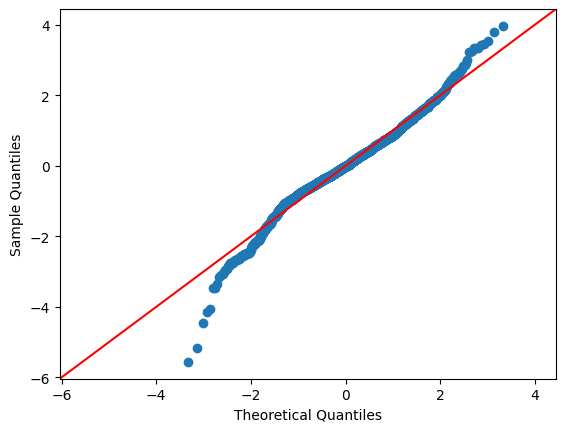

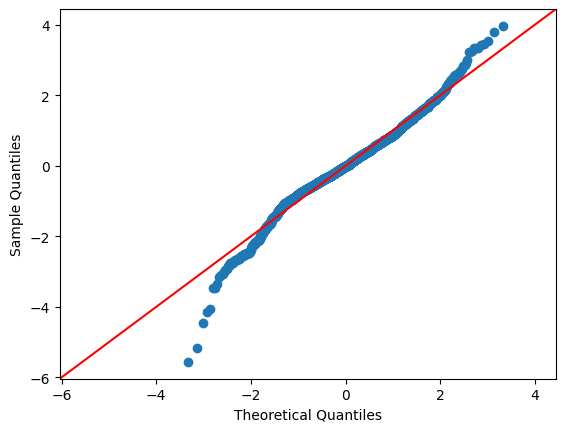

In [135]:
import statsmodels.api as sm
sm.qqplot(residual_train,line='45',fit=True)

###### skewness

In [136]:
from scipy.stats import skew
skew(residual_train)

-0.22988783278071187

In [138]:
skew(residual_test)

-0.13764648043700503

###### kdeplot

<Axes: xlabel='Life_expectancy', ylabel='Density'>

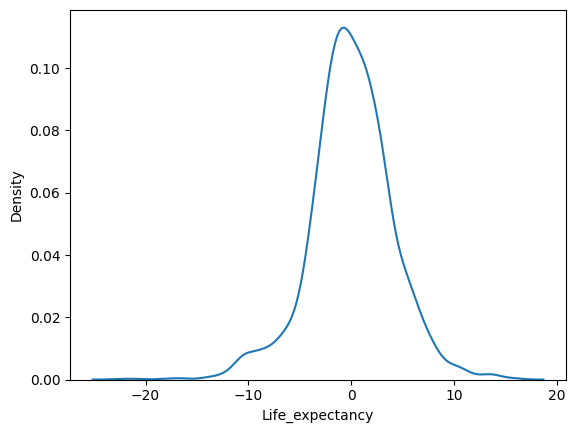

In [137]:
sns.kdeplot(residual_train)

###### 4.4 Homoscedasticity

<Axes: xlabel='Life_expectancy', ylabel='Life_expectancy'>

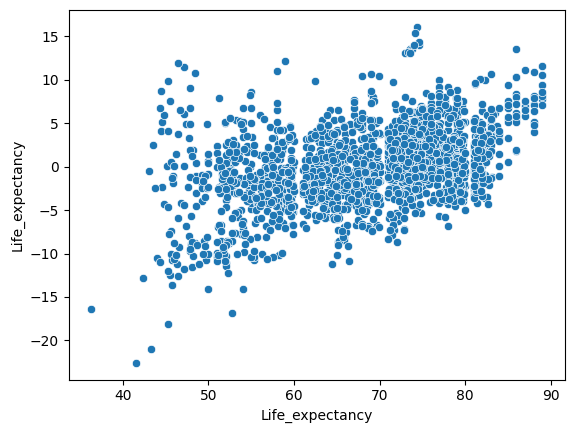

In [139]:
sns.scatterplot(x=y_train,y=residual_train)

In [140]:
json_data={'Status':{'Developing':1,'Developed':2}}

In [141]:
with open('json_data.json','w') as f:
    json.dump(json_data,f)

In [142]:
with open('Linear_Regression_Life_expectancy.pkl','wb') as f:
    pickle.dump(lin_reg,f)